In [38]:
from tqdm import trange
#  implementation of the game logic for quacks of quedlinburg boardgame
starterbag = [("white", 1)] * 4 + [("white", 2)] * 2 + [("white", 3)] + [("orange", 1)] + [("green", 1)]

moneros = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,15,16,16,17,17,18,18,19,19,20,20,21,21,22,22,23,23,24,24,25,25,26,26,27,27,28,28,29,29,30,30,31,31,32,32,33,33]
rubinis = [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
siegis =  [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9,10,10,10,11,11,11,12,12,12,12,13,13,13,14,14]


# shuffle the bag
bag = starterbag

# go through all permutations of the bag and calculate the average of the achieved points
# build list of permutations using numpy, considering unique elements
import numpy as np
import itertools
bag = starterbag
permutations = list(itertools.permutations(bag))
print(len(permutations))

moneros_achieveds = []
rubinis_achieveds = []
siegis_achieveds = []
spinnen_trigger = 0
init_chip = []

for i in trange(len(permutations)):
    # print(permutations[i])
    bag = list(permutations[i])
    cauldron = []
    knallerbsen = 0
    slot = 1
    drawing = True
    k = 0
    while drawing:
        if knallerbsen > 7:
            drawing = False
            break
        # draw a chip from the bag
        chip = bag.pop()
        cauldron.append(chip)
        if k == 0:
            init_chip.append(chip)
            k += 1
        slot += chip[1]
        # print(chip)
        if chip[0] == "white":
            knallerbsen += chip[1]
        # stop drawing if there is a possibility to have a total value of white chips of more than 7 with the next draw
        # print(max([x[1] for x in bag if x[0] == "white"]))
        # calculate odds of a drawing white that would make the total white chips more than 7
        
        
        # if max([x[1] for x in bag if x[0] == "white"]) > 7 - knallerbsen:
        #     drawing = False
            
    # check if one of last to elements in cauldron is a green chip
    if cauldron[-2][0] == "green" or cauldron[-1][0] == "green":
        spinnen_trigger += 1
          
    moneros_achieveds.append(moneros[slot])
    rubinis_achieveds.append(rubinis[slot])
    siegis_achieveds.append(siegis[slot])


362880


100%|██████████| 362880/362880 [00:14<00:00, 24649.19it/s]


In [27]:
spinnen_trigger/len(permutations)

0.1111111111111111

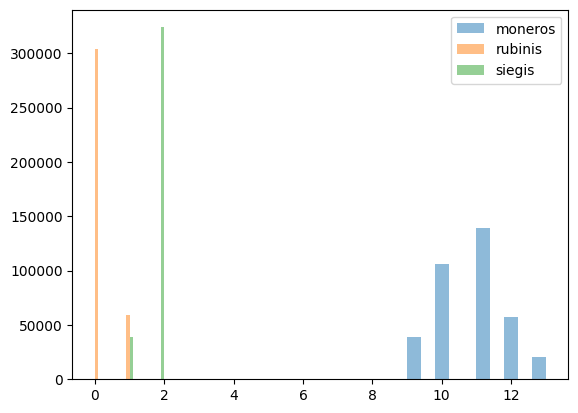

In [30]:
# plot results as histograms
import matplotlib.pyplot as plt
plt.hist(moneros_achieveds, alpha=0.5, label='moneros')
plt.hist(rubinis_achieveds, alpha=0.5, label='rubinis')
plt.hist(siegis_achieveds, alpha=0.5, label='siegis')
plt.legend(loc='upper right')

[('green', 1), ('orange', 1), ('green', 1), ('white', 3), ('orange', 1), ('white', 3), ('green', 1), ('orange', 1), ('green', 1), ('white', 2), ('orange', 1), ('white', 2), ('green', 1), ('white', 3), ('green', 1), ('white', 2), ('white', 3), ('white', 2), ('orange', 1), ('white', 3), ('orange', 1), ('white', 2), ('white', 3), ('white', 2), ('green', 1), ('orange', 1), ('green', 1), ('white', 3), ('orange', 1), ('white', 3), ('green', 1), ('orange', 1), ('green', 1), ('white', 2), ('orange', 1), ('white', 2), ('green', 1), ('white', 3), ('green', 1), ('white', 2), ('white', 3), ('white', 2), ('orange', 1), ('white', 3), ('orange', 1), ('white', 2), ('white', 3), ('white', 2), ('green', 1), ('orange', 1), ('green', 1), ('white', 2), ('orange', 1), ('white', 2), ('green', 1), ('orange', 1), ('green', 1), ('white', 2), ('orange', 1), ('white', 2), ('green', 1), ('white', 2), ('green', 1), ('white', 2), ('white', 2), ('white', 2), ('orange', 1), ('white', 2), ('orange', 1), ('white', 2), (

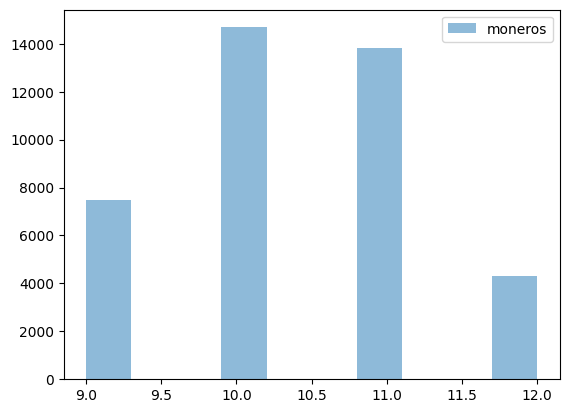

In [41]:
# mask where init_chip[1] == 3 
print(init_chip)
filtered_moneros = [moneros_achieveds[i] for i in range(len(moneros_achieveds)) if init_chip[i][1] == 3]
#filtered_rubinis = [rubinis_achieveds[i] for i in range(len(rubinis_achieveds)) if init_chip[i][1] == 3]
#filtered_siegis = [siegis_achieveds[i] for i in range(len(siegis_achieveds)) if init_chip[i][1] == 3]

# Plot the filtered results as histograms
plt.hist(filtered_moneros, alpha=0.5, label='moneros')
#plt.hist(filtered_rubinis, alpha=0.5, label='rubinis')
#plt.hist(filtered_siegis, alpha=0.5, label='siegis')
plt.legend(loc='upper right')
